In [12]:
import pandas as pd
import torch
import matplotlib.pyplot as plt

In [13]:
trainDF = pd.read_csv('train.csv')
print(trainDF.info())
trainDF.sample(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


PassengerId  Survived  Pclass                               Name   Sex  \
453          454         1       1           Goldenberg, Mr. Samuel L  male   
261          262         1       3  Asplund, Master. Edvin Rojj Felix  male   
42            43         0       3                Kraeff, Mr. Theodor  male   

      Age  SibSp  Parch  Ticket     Fare Cabin Embarked  
453  49.0      1      0   17453  89.1042   C92        C  
261   3.0      4      2  347077  31.3875   NaN        S  
42    NaN      0      0  349253   7.8958   NaN        C

In [14]:
testDF = pd.read_csv('test.csv')
print(testDF.info())
testDF.sample(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


PassengerId  Pclass                                    Name     Sex  \
214         1106       3  Andersson, Miss. Ida Augusta Margareta  female   
375         1267       1                Bowen, Miss. Grace Scott  female   
353         1245       2                      Herman, Mr. Samuel    male   

      Age  SibSp  Parch    Ticket     Fare Cabin Embarked  
214  38.0      4      2    347091    7.775   NaN        S  
375  45.0      0      0  PC 17608  262.375   NaN        C  
353  49.0      1      2    220845   65.000   NaN        S

In [15]:
concatDF = pd.concat([trainDF,testDF])
concatDF = concatDF.reset_index(drop=True)
pd.get_dummies(concatDF,columns=['Sex','Embarked']).drop(columns=['PassengerId','Name','Ticket','Cabin']).corr()

Survived    Pclass       Age     SibSp     Parch      Fare  \
Survived    1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307   
Pclass     -0.338481  1.000000 -0.408106  0.060832  0.018322 -0.558629   
Age        -0.077221 -0.408106  1.000000 -0.243699 -0.150917  0.178740   
SibSp      -0.035322  0.060832 -0.243699  1.000000  0.373587  0.160238   
Parch       0.081629  0.018322 -0.150917  0.373587  1.000000  0.221539   
Fare        0.257307 -0.558629  0.178740  0.160238  0.221539  1.000000   
Sex_female  0.543351 -0.124617 -0.063645  0.109609  0.213125  0.185523   
Sex_male   -0.543351  0.124617  0.063645 -0.109609 -0.213125 -0.185523   
Embarked_C  0.168240 -0.269658  0.085777 -0.048396 -0.008635  0.286269   
Embarked_Q  0.003650  0.230491 -0.019458 -0.048678 -0.100943 -0.130059   
Embarked_S -0.155660  0.096335 -0.075972  0.075198  0.073258 -0.172683   

            Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S  
Survived      0.543351 -0.543351    0.168240    0.003650   -0.155660  
Pclass       -0.124617  0.124617   -0.269658    0.230491    0.096335  
Age          -0.063645  0.063645    0.085777   -0.019458   -0.075972  
SibSp         0.109609 -0.109609   -0.048396   -0.048678    0.075198  
Parch         0.213125 -0.213125   -0.008635   -0.100943    0.073258  
Fare          0.185523 -0.185523    0.286269   -0.130059   -0.172683  
Sex_female    1.000000 -1.000000    0.066564    0.088651   -0.119504  
Sex_male     -1.000000  1.000000   -0.066564   -0.088651    0.119504  
Embarked_C    0.066564 -0.066564    1.000000   -0.164166   -0.775441  
Embarked_Q    0.088651 -0.088651   -0.164166    1.000000   -0.489874  
Embarked_S   -0.119504  0.119504   -0.775441   -0.489874    1.000000

In [16]:
featuredDF = pd.read_csv('train3.csv')
featuredDF = pd.get_dummies(featuredDF,columns=['Sex','Embarked','Pclass'])
featuredDF = featuredDF.drop(columns=['Ticket','Cabin'])
featuredDF['Age'] = featuredDF['Age']/featuredDF['Age'].max()
featuredDF['Fare'] = featuredDF['Fare']/featuredDF['Fare'].max()
featuredDF['SibSp'] = featuredDF['SibSp']/featuredDF['SibSp'].max()
featuredDF['Parch'] = featuredDF['Parch']/featuredDF['Parch'].max()
featuredDF = featuredDF.astype(float)
featuredDF[:891]

PassengerId  Survived     Age  SibSp     Parch      Fare      Name  \
0            1.0       0.0  0.2750  0.125  0.000000  0.014151  0.156673   
1            2.0       1.0  0.4750  0.125  0.000000  0.139136  0.782000   
2            3.0       1.0  0.3250  0.000  0.000000  0.015469  0.697802   
3            4.0       1.0  0.4375  0.125  0.000000  0.103644  0.782000   
4            5.0       0.0  0.4375  0.000  0.000000  0.015713  0.156673   
..           ...       ...     ...    ...       ...       ...       ...   
886        887.0       0.0  0.3375  0.000  0.000000  0.025374  0.000000   
887        888.0       1.0  0.2375  0.000  0.000000  0.058556  0.697802   
888        889.0       0.0  0.3000  0.125  0.222222  0.045771  0.697802   
889        890.0       1.0  0.3250  0.000  0.000000  0.058556  0.156673   
890        891.0       0.0  0.4000  0.000  0.000000  0.015127  0.156673   

     Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S  Pclass_1  \
0           0.0       1.0         0.0         0.0         1.0       0.0   
1           1.0       0.0         1.0         0.0         0.0       1.0   
2           1.0       0.0         0.0         0.0         1.0       0.0   
3           1.0       0.0         0.0         0.0         1.0       1.0   
4           0.0       1.0         0.0         0.0         1.0       0.0   
..          ...       ...         ...         ...         ...       ...   
886         0.0       1.0         0.0         0.0         1.0       0.0   
887         1.0       0.0         0.0         0.0         1.0       1.0   
888         1.0       0.0         0.0         0.0         1.0       0.0   
889         0.0       1.0         1.0         0.0         0.0       1.0   
890         0.0       1.0         0.0         1.0         0.0       0.0   

     Pclass_2  Pclass_3  
0         0.0       1.0  
1         0.0       0.0  
2         0.0       1.0  
3         0.0       0.0  
4         0.0       1.0  
..        ...       ...  
886       1.0       0.0  
887       0.0       0.0  
888       0.0       1.0  
889       0.0       0.0  
890       0.0       1.0  

[891 rows x 15 columns]

In [41]:
featuredDF = pd.read_csv('train3.csv')
featuredDF = pd.get_dummies(featuredDF,columns=['Sex','Embarked','Pclass'])
featuredDF = featuredDF.drop(columns=['Ticket'])
featuredDF['Age'] = featuredDF['Age']/featuredDF['Age'].max()
featuredDF['Fare'] = featuredDF['Fare']/featuredDF['Fare'].max()
featuredDF['SibSp'] = featuredDF['SibSp']/featuredDF['SibSp'].max()
featuredDF['Parch'] = featuredDF['Parch']/featuredDF['Parch'].max()

PassengerId  Survived     Age  SibSp     Parch      Fare      Name  \
1               2       1.0  0.4750  0.125  0.000000  0.139136  0.782000   
3               4       1.0  0.4375  0.125  0.000000  0.103644  0.782000   
6               7       0.0  0.6750  0.000  0.000000  0.101229  0.156673   
10             11       1.0  0.0500  0.125  0.111111  0.032596  0.697802   
11             12       1.0  0.7250  0.000  0.000000  0.051822  0.697802   
...           ...       ...     ...    ...       ...       ...       ...   
1295         1296       NaN  0.5375  0.125  0.000000  0.054107  0.156673   
1296         1297       NaN  0.2500  0.000  0.000000  0.027058  0.156673   
1298         1299       NaN  0.6250  0.125  0.111111  0.412821  0.156673   
1302         1303       NaN  0.4625  0.125  0.000000  0.175668  0.782000   
1305         1306       NaN  0.4875  0.000  0.000000  0.212559  1.000000   

     Cabin  Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S  \
1        C        True     False        True       False       False   
3        C        True     False       False       False        True   
6        E       False      True       False       False        True   
10       G        True     False       False       False        True   
11       C        True     False       False       False        True   
...    ...         ...       ...         ...         ...         ...   
1295     D       False      True        True       False       False   
1296     D       False      True        True       False       False   
1298     C       False      True        True       False       False   
1302     C        True     False       False        True       False   
1305     C        True     False        True       False       False   

      Pclass_1  Pclass_2  Pclass_3  
1         True     False     False  
3         True     False     False  
6         True     False     False  
10       False     False      True  
11        True     False     False  
...        ...       ...       ...  
1295      True     False     False  
1296     False      True     False  
1298      True     False     False  
1302      True     False     False  
1305      True     False     False  

[295 rows x 16 columns]

In [17]:
class MyDataset(torch.utils.data.Dataset):
    def __init__(self, DF:pd.DataFrame):
        self.PassengerId= DF['PassengerId'].values
        self.Servived = pd.get_dummies(DF['Survived']).values
        DF = DF.drop(columns=['PassengerId','Survived'])
        self.data = DF.astype(float).values
        pass

    def __len__(self):
        return len(self.PassengerId)

    def __getitem__(self, idx):

        x = torch.FloatTensor(self.data[idx])
        y = torch.FloatTensor(self.Servived[idx])
        return x, y


dataSet = MyDataset(DF=featuredDF[:891])
testSet = MyDataset(DF=featuredDF[891:])
dataSet[0]

(tensor([0.2750, 0.1250, 0.0000, 0.0142, 0.1567, 0.0000, 1.0000, 0.0000, 0.0000,
         1.0000, 0.0000, 0.0000, 1.0000]),
 tensor([1., 0.]))

In [18]:

trainSet, valSet = torch.utils.data.random_split(dataSet,(0.8,0.2))

In [19]:
trainLoader= torch.utils.data.DataLoader(trainSet,batch_size=2048,sampler=torch.utils.data.RandomSampler(trainSet))
valLoader= torch.utils.data.DataLoader(valSet,batch_size=2048,sampler=torch.utils.data.RandomSampler(valSet))
testLoader = torch.utils.data.DataLoader(testSet,batch_size=2048)
next(iter(trainLoader))

[tensor([[0.3875, 0.1250, 0.0000,  ..., 0.0000, 0.0000, 1.0000],
         [0.3375, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 1.0000],
         [0.3625, 0.0000, 0.4444,  ..., 0.0000, 0.0000, 1.0000],
         ...,
         [0.6750, 0.1250, 0.0000,  ..., 0.0000, 1.0000, 0.0000],
         [0.2750, 0.1250, 0.2222,  ..., 0.0000, 1.0000, 0.0000],
         [0.2875, 0.0000, 0.0000,  ..., 0.0000, 1.0000, 0.0000]]),
 tensor([[1., 0.],
         [1., 0.],
         [1., 0.],
         ...,
         [1., 0.],
         [0., 1.],
         [1., 0.]])]

In [20]:
# Get cpu, gpu or mps device for training.
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

# Define model
class NeuralNetwork(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_relu_stack = torch.nn.Sequential(
            torch.nn.Linear(13, 10),
            torch.nn.ReLU(),
            torch.nn.Linear(10, 7),
            torch.nn.ReLU(),
            torch.nn.Linear(7, 4),
            torch.nn.ReLU(),
            torch.nn.Linear(4, 2)
        )

    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

Using mps device
NeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=13, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=7, bias=True)
    (3): ReLU()
    (4): Linear(in_features=7, out_features=4, bias=True)
    (5): ReLU()
    (6): Linear(in_features=4, out_features=2, bias=True)
  )
)


In [21]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters())

cnt: 0 - valLoss: 0.6862121820449829 - trainLoss: 0.6729995012283325
cnt: 0 - valLoss: 0.6862000823020935 - trainLoss: 0.6729902625083923
cnt: 0 - valLoss: 0.6861879825592041 - trainLoss: 0.6729810237884521
cnt: 0 - valLoss: 0.6861758828163147 - trainLoss: 0.6729718446731567
cnt: 0 - valLoss: 0.6861638426780701 - trainLoss: 0.6729626059532166
cnt: 0 - valLoss: 0.6861517429351807 - trainLoss: 0.6729534268379211
cnt: 0 - valLoss: 0.6861397624015808 - trainLoss: 0.6729442477226257
cnt: 0 - valLoss: 0.6861277222633362 - trainLoss: 0.6729351282119751
cnt: 0 - valLoss: 0.6861157417297363 - trainLoss: 0.6729259490966797
cnt: 0 - valLoss: 0.6861037611961365 - trainLoss: 0.672916829586029
cnt: 0 - valLoss: 0.6860917210578918 - trainLoss: 0.6729076504707336
cnt: 0 - valLoss: 0.6860798001289368 - trainLoss: 0.672898530960083
cnt: 0 - valLoss: 0.6860678195953369 - trainLoss: 0.6728894710540771
cnt: 0 - valLoss: 0.6860558390617371 - trainLoss: 0.6728803515434265
cnt: 0 - valLoss: 0.6860439777374268

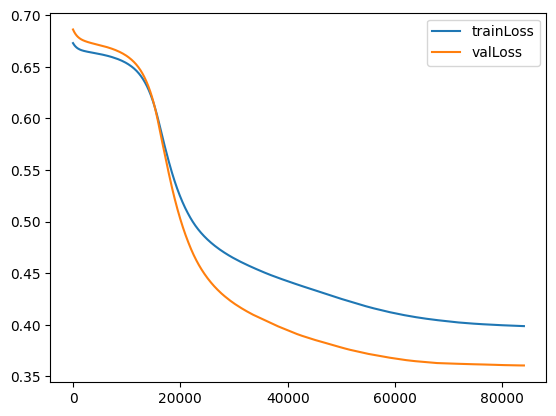

In [22]:
def trainAI(dataloader, model, loss_fn, optimizer):
    model.train()
    trainLoss=0
    for X, y in dataloader:
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)
        trainLoss +=loss.item()

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    return trainLoss

def valAI(dataloader, model, loss_fn):
    model.eval()
    valLoss =0
    with torch.no_grad():
        for X ,y  in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            loss = loss_fn(pred, y)
            # for i in loss:
            valLoss+= loss.item()
    return valLoss

trainLoss=[]
valLoss=[]
bestModel = model
bestLoss = float('inf')
cnt=0

while(cnt<100):
    trainLoss.append(trainAI(trainLoader, model, loss_fn, optimizer))
    valLoss.append(valAI(valLoader, model, loss_fn))

    print(f'cnt: {cnt} - valLoss: {valLoss[-1]} - trainLoss: {trainLoss[-1]}')
    if bestLoss<valLoss[-1]:
        cnt+=1
    else:
        cnt = 0
        bestLoss = valLoss[-1]
        bestModel = model

plt.plot(trainLoss,label='trainLoss')
plt.plot(valLoss,label='valLoss')
plt.legend()
plt.close()

In [23]:
def testAI(dataloader, model):
    model.eval()
    result = []
    y=892
    with torch.no_grad():
        for X ,_  in dataloader:
            X  = X.to(device)
            pred = model(X)
            for i in pred:
                result.append([y,torch.argmax(i).item()])
                y+=1
    return result

result = testAI(testLoader, bestModel)
result = pd.DataFrame(result)
result = result.astype(int)
result.columns=['passengerId','Survived']
result

passengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         0
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         1

[418 rows x 2 columns]

In [24]:
result.to_csv('result.csv',index=False)